<h1>Проверка гипотез по увеличению выручки в интернет-магазине: оценка результатов A/B теста</h1>

**Описание проекта:** 

Крупный интернет-магазин. Отдел маркетинга подготовил 9 гипотез по увеличению выручки. Каждая гипотеза оценена по параметрам Reach, Impact, Confidence, Effort. Необходимо приоритизировать гипотезы и принять решение по результатам А/В-теста приоритетной гипотезы.

**Задачи:** 
- приоритизировать гипотезы увеличения выручки интернет-магазина;
- оценить результаты А/В-теста приоритетной гипотезы;
- принять решение по результатам А/В-теста.

**Содержание проекта:**

1. [Часть 1. Приоритизация гипотез](#step1)  
2. [Часть 2. Анализ А/В-теста](#step2)  
  - 2.1. [Предобработка данных](#step3)
  - 2.2. [Анализ кумулятивных данных по группам теста](#step4) 
    - [Продажи](#step3.2) 
    - [Маркетинг](#step3.3) 
4. [Общие выводы и рекомендации](#step4)

<h2>Часть 1. Приоритизация гипотез<a id=step1></a></h2>

Импортируем необходимые для анализа библиотеки:

In [2]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

Изучим файл с гипотезами:

In [3]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep=",")
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Приведём названия столбцов в нижний регистр:

In [4]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Рассчитаем показатель ICE в отдельном столбце:

In [5]:
hypothesis['ICE'] = ((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(1)

Отсортируем гипотезы по убыванию значений ICE:

In [6]:
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.2
0,"Добавить два новых канала привлечения трафика,...",13.3
7,Добавить форму подписки на все основные страни...,11.2
6,Показать на главной странице баннеры с актуаль...,8.0
2,Добавить блоки рекомендаций товаров на сайт ин...,7.0
1,"Запустить собственную службу доставки, что сок...",2.0
5,"Добавить страницу отзывов клиентов о магазине,...",1.3
3,"Изменить структура категорий, что увеличит кон...",1.1
4,"Изменить цвет фона главной страницы, чтобы уве...",1.0


Если не учитывать охвата пользователей, то по влиянию на пользователей самыми приоритетными являются гипотезы №8, №0 и №7.

Рассчитаем показатель RICE в отдельном столбце:

In [7]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

Отсортируем гипотезы по убыванию значений RICE:

In [8]:
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


**Выводы по части 1:**

Если, кроме силы влияния на пользователей, учитывать и широту охвата пользователей, то лидируют гипотезы №7, №2 и №0. Гипотеза №8 выбыла из приоритетных. Гипотеза №7 является самой приоритетной из-за параметра 'reach', который является самым высоким среди конкурентов, при относительно высоких показателях влияния на пользователя (impact), уверенности в выставленных оценках (confidence), а также среднем показателе требуемых для проверки усилий (efforts).

<h2>Часть 2. Анализ А/В-теста<a id=step2></a></h2>

<h3>Предобработка данных<a id = step3></a></h3>

Изучим файл с результатами A/B-теста:

In [9]:
orders = pd.read_csv('/datasets/orders.csv', sep=",")
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
orders.group.unique()

array(['B', 'A'], dtype=object)

In [12]:
visitors = pd.read_csv('/datasets/visitors.csv', sep=",")
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [13]:
visitors.group.unique()

array(['A', 'B'], dtype=object)

In [14]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Датафреймы visitors и orders не содержат пропусков. Строковые значения в столбцах 'group' обоих датафреймов содержат по два значения 'A' и 'B'. 

Названия столбцов в orders необходимо привести к единому стилю. Сделаем это:

In [15]:
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']
orders.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

Даты необходимо привести к формату datetime. Сделаем это:

In [16]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Проверим тип данных:

In [17]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [18]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transaction_id    1197 non-null int64
visitor_id        1197 non-null int64
date              1197 non-null datetime64[ns]
revenue           1197 non-null int64
group             1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Тип данных соответствует значениям.

Проверим данные на присутствие дублей:

In [19]:
visitors.duplicated().sum()

0

In [20]:
orders.duplicated().sum()

0

Полные дубликаты в наблюдениях отсутствуют.

Проверим данные на присутствие аномалий:

In [21]:
#Создадим массив с интересующими нас названиями столбцов
df_columns = [visitors.date, orders.date, visitors.visitors, orders.revenue]

In [22]:
for column in df_columns:
    print(column.describe())
    print()

count                      62
unique                     31
top       2019-08-02 00:00:00
freq                        2
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

count                    1197
unique                     31
top       2019-08-05 00:00:00
freq                       48
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

count     62.000000
mean     607.290323
std      114.400560
min      361.000000
25%      534.000000
50%      624.500000
75%      710.500000
max      770.000000
Name: visitors, dtype: float64

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64



Данные о заказах и посетителях принадлежат отдому временному диапазону с 01.08.2019 по 31.08.2019. Данные о количестве посетителей в день выглядят нормально распределёнными с небольшим смещением влево. Данные о выручке содержат выбросы, т.к. среднее значение в 2,5 раза выше медианы.

Посмотрим распределение выручки на диаграмме:

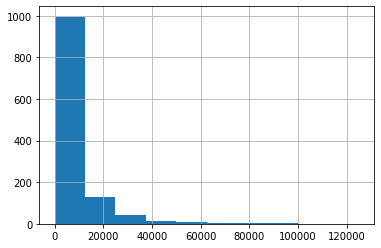

In [23]:
orders.revenue.hist(range=(0, 125000));

(0, 125000)

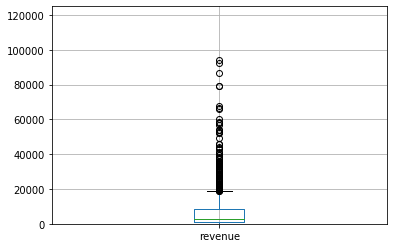

In [24]:
orders.boxplot(column='revenue')
plt.ylim(0, 125000)

Определим количество и долю аномальных значений выручки:

In [25]:
revenue_normal_limit = 50000  #будем считать аномальной выручкой значения, выше этого 

In [26]:
abnormal_revenue_counts = orders.query('revenue>@revenue_normal_limit')['revenue'].count()
abnormal_revenue_counts

21

In [27]:
abnormal_revenue_sum = orders.query('revenue>@revenue_normal_limit')['revenue'].sum()
abnormal_revenue_sum

2740462

In [28]:
abnormal_revenue_counts / orders.revenue.count()

0.017543859649122806

In [29]:
abnormal_revenue_sum / orders.revenue.sum()

0.2742501598438759

Мы имеем 21 значение выручки выше 50000 руб., что составляет 1,8% от общего количества. При этом сумма выручки этих значений составляет 27,4% от общей суммы выручки, что подтверждает сильное искажающее влияние данных значений, на общую статистику по выручке. Запомним этот факт и учтём его в дальнейшем анализе.

<h3>Анализ кумулятивных данных по группам теста<a id = step4></a></h3>

Создадим массив уникальных пар значений дат и групп теста:

In [30]:
dates_groups = orders[['date','group']].drop_duplicates()
dates_groups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


Получим агрегированные кумулятивные по дням данные о заказах:

In [31]:
orders_aggregated = (dates_groups
    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
        .agg({'date' : 'max',   #максимальная дата в orders равна очередной дате в dates_groups
              'group' : 'max',  #здесь просто выводим соответствующую группу теста
              'transaction_id' : 'nunique', #считаем количество уникальных заказов
              'visitor_id' : 'nunique',     #считаем количество уникальных покупателей
              'revenue' : 'sum'}),                  #сумма всех заказов за предыдущий период на соответствующую дату
        axis=1)
    .sort_values(by=['date','group'])           #сортируем по дате и группе теста
    )

orders_aggregated.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


Получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина:

In [32]:
visitors_aggregated = (dates_groups
    .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
        .agg({'date' : 'max',           #максимальная дата в visitors равна очередной дате в dates_groups
              'group' : 'max',          #здесь просто выводим соответствующую группу теста
              'visitors' : 'sum'}),     #считаем кумулятивное количество посетителей за весь предыдущий период
        axis=1)
    .sort_values(by=['date','group'])   #сортируем по дате и группе теста
)

visitors_aggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Объединим кумулятивные данные в одной таблице и присвоим ее столбцам понятные названия:

In [33]:
cumulative_data = orders_aggregated.merge(visitors_aggregated, on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Создадим датафреймы с кумулятивным количеством заказов и кумулятивной выручкой по дням отдельно в группе А и в группе B:

In [34]:
cumulative_revenue_A = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]
cumulative_revenue_A.head()

,date,revenue,orders
0,2019-08-01,148579,24
2,2019-08-02,242401,44
4,2019-08-03,354874,68
6,2019-08-04,425699,84
8,2019-08-05,549917,109


In [35]:
cumulative_revenue_B = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]
cumulative_revenue_B.head()

,date,revenue,orders
1,2019-08-01,101217,21
3,2019-08-02,266748,45
5,2019-08-03,380996,61
7,2019-08-04,489567,78
9,2019-08-05,581995,101


**График кумулятивной выручки по группам**

Text(0, 0.5, 'roubles')

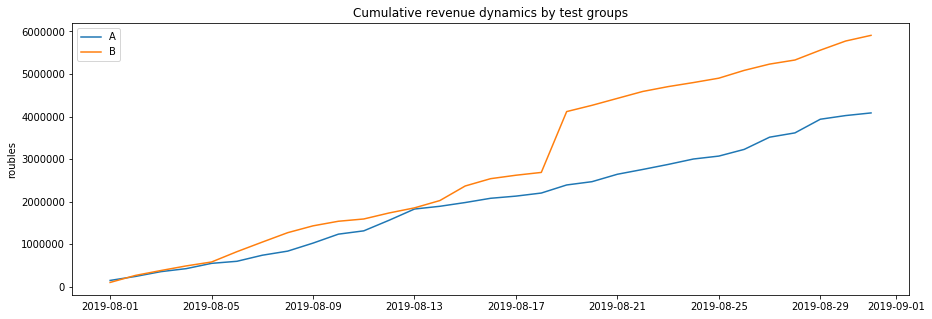

In [36]:
plt.figure(figsize=(15, 5))
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label='B')
plt.title('Cumulative revenue dynamics by test groups')
plt.legend()
plt.ylabel('roubles')

Равномерное увеличение выручки в первой половине тестового периода прерывается резким одномоментным увеличением выручки в группе В, затем продолжается параллельная динамика. Это может говорить либо о резком увеличении числа заказов в группе B, либо об аномальной величине некоторых заказов. Проверим это в дальнейшем анализе.

**График кумулятивного среднего чека по группам**

Text(0, 0.5, 'roubles')

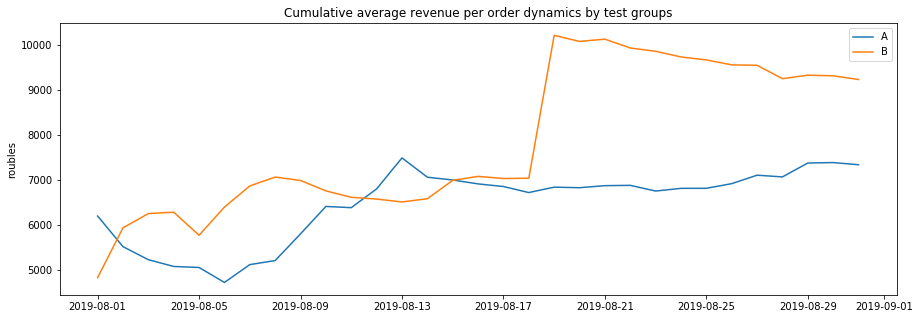

In [37]:
#Разделим кумулятивную выручку на кумулятивное число заказов
plt.figure(figsize=(15, 5))
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue']/cumulative_revenue_A['orders'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue']/cumulative_revenue_B['orders'], label='B')
plt.title('Cumulative average revenue per order dynamics by test groups')
plt.legend()
plt.ylabel('roubles')

Во второй половине тестового периода средний чек в группе А стабилизировался. В группе B после резкого увеличения, в середине тестового периода, средний чек постепенно снижается, сглаживая аномальную активность предыдущего периода (крупные заказы отразились всплеском на графике), но ему необходимо ещё время для стабилизации.

**График относительного изменения кумулятивного среднего чека группы B к группе A**

Собираем кумулятивные данные в одном датафрейме:

In [38]:
merged_cumulative_revenue = cumulative_revenue_A.merge(cumulative_revenue_B, on='date', how='left', suffixes=['_A', '_B'])
merged_cumulative_revenue.head()

,date,revenue_A,orders_A,revenue_B,orders_B
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


Строим отношение средних чеков и добавляем дополнительную ось Х:

Text(0, 0.5, 'share')

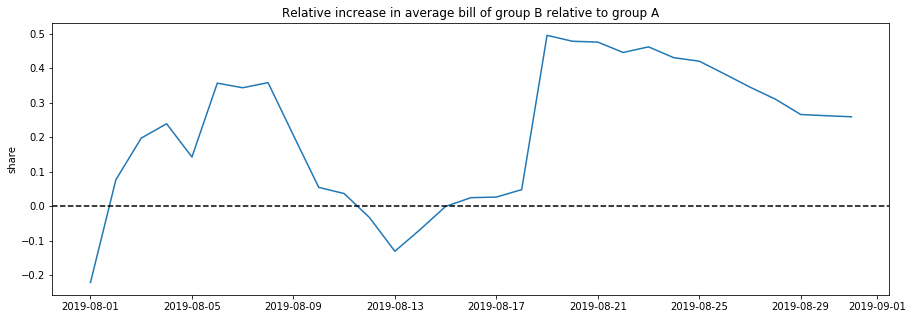

In [39]:
plt.figure(figsize=(15, 5))
#График отражает разницу, на сколько средний чек в группе B отличается от среднего чека в группе А
plt.plot(merged_cumulative_revenue['date'], 
             (merged_cumulative_revenue['revenue_B']/merged_cumulative_revenue['orders_B'])/
             (merged_cumulative_revenue['revenue_A']/merged_cumulative_revenue['orders_A'])-1)
#Устанавливаем визуальный уровень равенства данных в группах А и В:
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Relative increase in average bill of group B relative to group A')
plt.ylabel('share')

График нестабилен.Причиной могут быть крупные заказы и выбросы.

**График кумулятивной конверсии по группам**

Рассчитаем кумулятивную конверсию:

In [40]:
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856


Отделим данные по группе A и по группе В:

In [41]:
cumulative_data_A = cumulative_data[cumulative_data['group']=='A']
cumulative_data_B = cumulative_data[cumulative_data['group']=='B']

Построим графики, задав масштаб осей:

Text(0, 0.5, 'Conversion Rate')

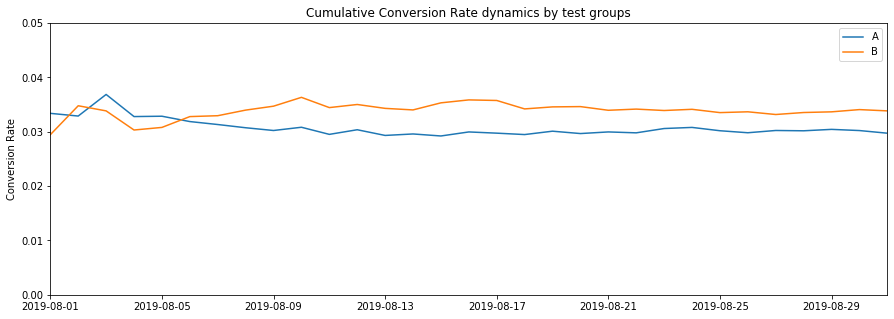

In [42]:
plt.figure(figsize=(15, 5))
plt.plot(cumulative_data_A['date'], cumulative_data_A['conversion'], label='A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['conversion'], label='B')
plt.legend()
plt.axis(["2019-08-01", '2019-08-31', 0, 0.05])
plt.title('Cumulative Conversion Rate dynamics by test groups')
plt.ylabel('Conversion Rate')

После колебаний конверсии в группах относительно друг друга в первую неделю теста, конверсия группы В вырвалась вперёд и стабилизировалась, в то время как конверсия группы B просела и также зафиксировалась.

**График относительного изменения кумулятивной конверсии группы B к группе A**

Соединим кумулятивные данные двух групп в одну таблицу:

In [43]:
merged_cumulative_conversions = (cumulative_data_A[['date','conversion']]
    .merge(cumulative_data_B[['date','conversion']], 
        on='date', 
        how='left', 
        suffixes=['_A', '_B'])
    )

merged_cumulative_conversions.head()

,date,conversion_A,conversion_B
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


Посторим график относительного прироста конверсии группы B относительно группы A:

['2019-08-01', '2019-08-31', -0.2, 0.4]

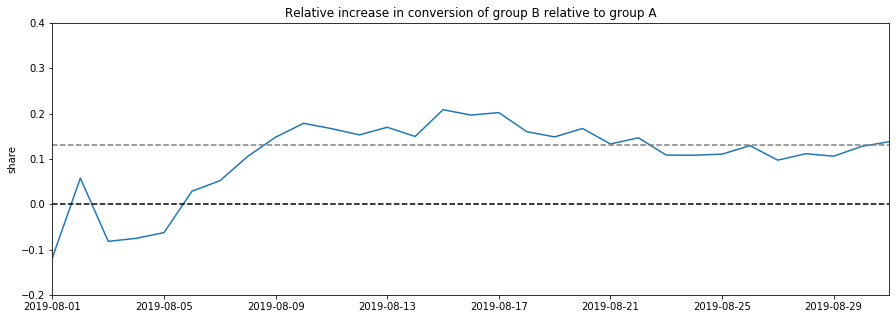

In [44]:
plt.figure(figsize=(15, 5))
plt.plot(merged_cumulative_conversions['date'], 
         merged_cumulative_conversions['conversion_B']/merged_cumulative_conversions['conversion_A']-1)
plt.title('Relative increase in conversion of group B relative to group A')
plt.ylabel('share')
plt.axhline(y=0, color='black', linestyle='--')      #уровень равенства конверсии в группах А и В
plt.axhline(y=0.13, color='grey', linestyle='--')    #примерный уровень стабилизации конверсии в гр. В, относительно гр. А
plt.axis(["2019-08-01", '2019-08-31', -0.2, 0.4])    #диапазон значений осей

Конверсия в группе В в начале теста сделала рывок и превысила конверсию в группе А. Затем она на 4 дня просела ниже конверсии в группе А, чтобы снова увеличится до уровня порядка 20%,превышающего конверсию в группе А. Последние три недели конверсия в группе В пытается стабилизироваться вокруг уровня на 13% выше конверсии в группе А. Однако, пока нельзя с уверенностью сказать, что она стабилизировалась. Выводы делать рано, необходимо проанализировать влияние аномалий.

**Точечный график количества заказов по пользователям**

<div class = "alert alert-warning">
<h2> Комментарии ревьюера </h2>

Здесь не хватает логического перехода между разделами, обоснования, зачем ты строишь точечные графики. Выше ты писал, что в данных возможно наличие выбросов. Будет здорово, если сможешь добавить описание раздела :)

</div>

Определим количество заказов на одного покупателя:

In [45]:
orders_by_buyers = (orders
    .drop(['group', 'revenue', 'date'], axis=1)    #Удаляем лишние столбцы
    .groupby('visitor_id', as_index=False)         #Группируем по покупателям
    .agg({'transaction_id' : 'nunique'})   #Считаем уникальные заказы на каждого покупателя
    )

orders_by_buyers.columns = ['buyer_id', 'orders']                    #Понятно называем столбцы
orders_by_buyers.sort_values(by='orders',ascending=False).head(10)     #Сортируем количество заказов по убыванию

,buyer_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Есть небольшое количество покупателей, сделавших в 2 раза больше заказов, чем основная масса покупателей в первой 10-ке самых активных. Это может влиять на статистику средних значений. Изучим количество заказов на одного покупателя на точечной диаграмме:

Text(0, 0.5, 'Orders')

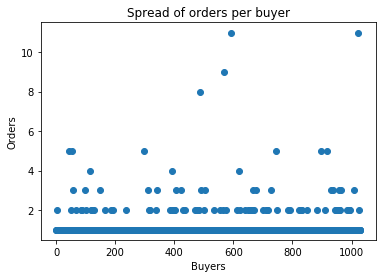

In [46]:
#Создадим объект Series длиной, равной количеству наблюдений (покупателей) в таблице orders_by_users
x_values_orders_by_buyers = pd.Series(range(0,len(orders_by_buyers['buyer_id'])))
#Точечный график размера заказов:
#plt.figure(figsize=(5, 10))
plt.scatter(x_values_orders_by_buyers, orders_by_buyers['orders'])
plt.title('Spread of orders per buyer')
plt.xlabel('Buyers')
plt.ylabel('Orders')

Судя по графику можно предположить, что аномальным количеством покупок на одного покупателя можно считать от 3-х покупок. Однако, принято отсеивать от 1% до 5% крайних значений. Определим эти уровни, рассчитав 95-й и 99-й перцентили количества заказов на одного покупателя.

**Определение границы аномальных пользователей**

Рассчитаем 95-й и 99-й перцентили количества заказов на одного покупателя:

In [47]:
np.percentile(orders_by_buyers['orders'], [95, 99])

array([2., 4.])

Не более 5% покупателей сделали более 2 заказов и только 1% - 4 заказа и более. Будем считать аномальными пользователей с  количеством заказов более двух.

**Tочечный график стоимостей заказов**

Text(0, 0.5, 'Order values')

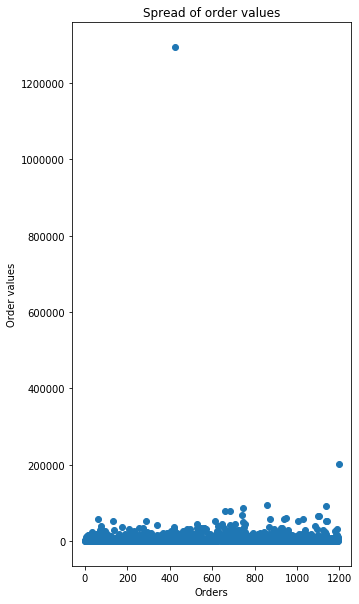

In [48]:
#Создадим объект Series длиной, равной количеству заказов в исходной таблице orders
x_values_orders = pd.Series(range(0,len(orders['revenue'])))
#Точечный график размера заказов:
plt.figure(figsize=(5, 10))
plt.scatter(x_values_orders, orders['revenue'])
plt.title('Spread of order values')
plt.xlabel('Orders')
plt.ylabel('Order values')

Очевидно искажающее влияние на статистику двух выбросов с суммами выручки выше 200 тыс. руб. Изучим распределение подробнее, применив более мелкий масштаб:

Text(0, 0.5, 'Order values')

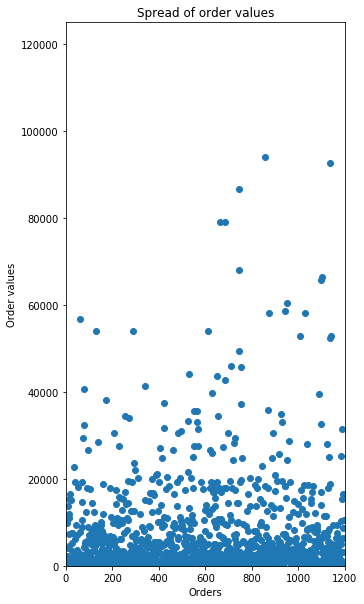

In [49]:
plt.figure(figsize=(5, 10))
plt.scatter(x_values_orders, orders['revenue'])
plt.axis([0, 1200, 0, 125000])
plt.title('Spread of order values')
plt.xlabel('Orders')
plt.ylabel('Order values')

На графике видно, что размер основной массы заказов находится в пределах 60000 рублей. Более дорогие заказы можно принять за аномальные и отсеить. Для более точного определения аномалий рассчитаем 95-й и 99-й перцентили стоимости заказов.

**Определение границы аномальных заказов**

Рассчитаем 95-й и 99-й перцентили стоимости заказов:

In [50]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% заказов стоимостью более 28 000 руб., и 1% заказов стоимостью более 58 233 руб. Будем считать аномальными заказы, стоимостью более 40 000 руб.

**Статистическая значимость различий в конверсии между группами по «сырым» данным**

<div class = "alert alert-warning">
<h2> Комментарии ревьюера </h2>

Здесь также не хватает логического перехода между разделами: перехода к проверке гипотез, формулировки нулевой и альтернативной гипотез, выбора уровня значимости и статистического критерия для проверки. Человек, знакомый с заданием, конечно, поймет, почему ты переходишь к проверке статистической значимости различий в конверсии и в среднем чеке между группами данных. Но если рассматривать работу как самостоятельную единицу, то результаты твоей аналитики будут еще лучше, если будет прослеживаться структура - от подготовки данных к анализу бизнес-метрик, при котором ты сделал предположение о выбросах данных. Потом ты анализируешь выбросы и переходишь к А/В тесту, чтобы проверить, как повлияло введение нового шрифта на работу приложения для данных с выбросами и для очищенных данных.

</div>

Приведём названия столбцов в таблице merged_cumulative_revenue в соответствие их действительным значениям:

In [51]:
merged_cumulative_revenue.columns = ['date', 'revenue_cumulative_A', 'orders_cumulative_A', 
                                     'revenue_cumulative_B', 'orders_cumulative_B']
merged_cumulative_revenue.head()

,date,revenue_cumulative_A,orders_cumulative_A,revenue_cumulative_B,orders_cumulative_B
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


Разделим кумулятивные по дням данные о посетителях по группам теста:

In [52]:
cumulative_visitors_A = cumulative_data[cumulative_data['group']=='A'][['date','visitors']]
cumulative_visitors_A.columns = ['date', 'visitors_comulative_A']  #приведём в соответствие название столбца
cumulative_visitors_A.head()

,date,visitors_comulative_A
0,2019-08-01,719
2,2019-08-02,1338
4,2019-08-03,1845
6,2019-08-04,2562
8,2019-08-05,3318


In [53]:
cumulative_visitors_B = cumulative_data[cumulative_data['group']=='B'][['date','visitors']]
cumulative_visitors_B.columns = ['date', 'visitors_comulative_B']  #приведём в соответствие название столбца
cumulative_visitors_B.head()

,date,visitors_comulative_B
1,2019-08-01,713
3,2019-08-02,1294
5,2019-08-03,1803
7,2019-08-04,2573
9,2019-08-05,3280


Рассчитаем ежедневное количество посетителей в группах теста:

In [54]:
visitors_A_daily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitors_A_daily.columns = ['date', 'visitors_per_date_A']
visitors_A_daily.head()

,date,visitors_per_date_A
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


In [55]:
visitors_B_daily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitors_B_daily.columns = ['date', 'visitors_per_date_B']
visitors_B_daily.head()

,date,visitors_per_date_B
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707


Рассчитаем ежедневное количество и величину заказов в группах теста:

In [56]:
orders_A_daily = (orders[orders['group']=='A'][['date', 'transaction_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id' : 'nunique', 'revenue' : 'sum'})
    )
orders_A_daily.columns = ['date', 'orders_per_date_A', 'revenue_per_date_A']
orders_A_daily.head()

,date,orders_per_date_A,revenue_per_date_A
0,2019-08-01,24,148579
1,2019-08-02,20,93822
2,2019-08-03,24,112473
3,2019-08-04,16,70825
4,2019-08-05,25,124218


In [57]:
orders_B_daily = (orders[orders['group']=='B'][['date', 'transaction_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id' : 'nunique', 'revenue' : 'sum'})
    )
orders_B_daily.columns = ['date', 'orders_per_date_B', 'revenue_per_date_B']
orders_B_daily.head()

,date,orders_per_date_B,revenue_per_date_B
0,2019-08-01,21,101217
1,2019-08-02,24,165531
2,2019-08-03,16,114248
3,2019-08-04,17,108571
4,2019-08-05,23,92428


Объединим данные в одной таблице:

In [58]:
data = (merged_cumulative_revenue.merge(cumulative_visitors_A, on='date', how='left')
    .merge(cumulative_visitors_B, on='date', how='left')
    .merge(visitors_A_daily, on='date', how='left')
    .merge(visitors_B_daily, on='date', how='left')
    .merge(orders_A_daily, on='date', how='left')
    .merge(orders_B_daily, on='date', how='left')
    )
data.head()

,date,revenue_cumulative_A,orders_cumulative_A,revenue_cumulative_B,orders_cumulative_B,visitors_comulative_A,visitors_comulative_B,visitors_per_date_A,visitors_per_date_B,orders_per_date_A,revenue_per_date_A,orders_per_date_B,revenue_per_date_B
0,2019-08-01,148579,24,101217,21,719,713,719,713,24,148579,21,101217
1,2019-08-02,242401,44,266748,45,1338,1294,619,581,20,93822,24,165531
2,2019-08-03,354874,68,380996,61,1845,1803,507,509,24,112473,16,114248
3,2019-08-04,425699,84,489567,78,2562,2573,717,770,16,70825,17,108571
4,2019-08-05,549917,109,581995,101,3318,3280,756,707,25,124218,23,92428


Проверка показала, что соединение таблиц произошло без потерь данных. Создадим переменные orders_by_visitors_A и orders_by_visitors_A со столбцами 'visitor_id' и 'orders'. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [59]:
orders_by_visitors_A = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : 'nunique'})
orders_by_visitors_A.columns = ['visitor_id', 'orders']
orders_by_visitors_A.head()

,visitor_id,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [60]:
orders_by_visitors_B = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : 'nunique'})
orders_by_visitors_B.columns = ['visitor_id', 'orders']
orders_by_visitors_B.head()

,visitor_id,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


Объявим переменные sample_A и sample_B, в которых посетителям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули:

In [61]:
sample_A = pd.concat([orders_by_visitors_A['orders'],
    pd.Series(0, index=np.arange(data['visitors_per_date_A'].sum() - len(orders_by_visitors_A['orders'])), name='orders')],
    axis=0)    #Присоединяем строки 

In [62]:
sample_B = pd.concat([orders_by_visitors_B['orders'],
    pd.Series(0, index=np.arange(data['visitors_per_date_B'].sum() - len(orders_by_visitors_B['orders'])), name='orders')],
    axis=0)  

Получили выборки, где число элементов — это количество пользователей, а сумма всех элементов — количество заказов. Соответственно, среднее значение по выборке будет равно конверсии (количество заказов, делённое на количество пользователей)

Разницу средних (по факту - конверсий) в группах А и В проверим критерием Манна-Уитни:

In [63]:
'{0:.3f}'.format(stats.mannwhitneyu(sample_A, sample_B)[1])

'0.008'

P-value равен 0,8%, что ниже уровня статистической значимости 5%. Соответственно, гипотеза о равенстве средних может быть отвергнута, из чего можно сделать вывод о том, что "по сырым данным" конверсии в группах А и В статистически различны.

In [64]:
'{0:.3f}'.format(sample_B.mean()/sample_A.mean()-1)

'0.138'

"Сырые" данные говорят, что конверсия в группе В на 13,8% выше конверсии в группе А.

**Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным**

Передадим критерию mannwhitneyu() данные о выручке с заказов:

In [65]:
'{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])

'0.365'

P-value, равный 36,5% (больше 5% уровня статистической значимости) не позволяет отвергнуть нулевую гипотезу о статистической неразличимости средних чеков в двух тестовых группах.

In [66]:
'{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)

'0.259'

Однако, относительная разница показывает, что средний чек в группе В на 25,9% выше среднего чека в группе А. Это может быть следствием влияния аномальных значений размера заказов в группе В.

**Статистическая значимость различий в конверсии между группами по «очищенным» данным**

Примем за аномальных пользователей тех, кто совершил более 2 заказов или совершил заказ дороже 40 000 рублей (это мы определили ранее). Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. 

Сделаем срез пользователей из обеих тестовых групп с числом заказов больше двух:

In [67]:
users_with_many_orders = pd.concat([orders_by_visitors_A[orders_by_visitors_A['orders'] > 2]['visitor_id'], 
    orders_by_visitors_B[orders_by_visitors_B['orders'] > 2]['visitor_id']], axis = 0)
users_with_many_orders.head()

18      199603092
23      237748145
68      611059232
146    1230306981
189    1614305549
Name: visitor_id, dtype: int64

Сделаем срез пользователей из обеих тестовых групп с суммой заказа более 30000 руб.:

In [68]:
users_with_expensive_orders = orders[orders['revenue'] > 40000]['visitor_id']
users_with_expensive_orders.head()

60     4256040402
78     3288820196
131    2254586615
287    2254456485
339     834731816
Name: visitor_id, dtype: int64

Объединим эти списки аномальных пользователей в одном, удалив дубли:

In [69]:
abnormal_users = pd.concat([users_with_many_orders, users_with_expensive_orders], axis = 0).drop_duplicates().sort_values()
abnormal_users.head()

1099    148427295
18      199603092
23      237748145
37      249864742
684     358944393
Name: visitor_id, dtype: int64

Доля аномальных покупателей в общем количестве:

In [70]:
abnormal_users_share = abnormal_users.shape[0] / orders.visitor_id.nunique()
abnormal_users_share

0.04364694471387003

Аномальных покупателей 4,4% от общего количества.

Подготовим выборки количества заказов по пользователям в разных тестовых группах. К списку количества заказов пользователей, не являющихся аномальными, добавим список нулевых значений в количестве, равном количеству пользователей, не совершивших ни одного заказа:

In [71]:
sample_A_filtered = pd.concat([orders_by_visitors_A[np.logical_not(orders_by_visitors_A['visitor_id'].isin(abnormal_users))]['orders'],
    pd.Series(0, index=np.arange(data['visitors_per_date_A'].sum() - len(orders_by_visitors_A['orders'])),name='orders')],axis=0)

In [72]:
sample_B_filtered = pd.concat([orders_by_visitors_B[np.logical_not(orders_by_visitors_B['visitor_id'].isin(abnormal_users))]['orders'],
    pd.Series(0, index=np.arange(data['visitors_per_date_B'].sum() - len(orders_by_visitors_B['orders'])),name='orders')],axis=0)

Для определения статистических различий в средних значениях применим критерий Манна-Уитни к полученным выборкам:

In [73]:
'{0:.3f}'.format(stats.mannwhitneyu(sample_A_filtered, sample_B_filtered)[1])

'0.003'

P-value (0,3%) находится в критической зоне статистической значимости (меньше 5%), что говорит о малой вероятности случайно получить различия в средних значениях двух выборок. Соответственно, нулевая гипотеза о равности двух выборочных средних отклоняется. Рассчитаем относительную разницу средних значений двух выборок:

In [74]:
'{0:.3f}'.format(sample_B_filtered.mean()/sample_A_filtered.mean()-1)

'0.188'

Очищенные данные подтвердили вывод о том, что конверсии в группах А и В статистически отличаются друг от друга. По уточнённым данным средняя конверсия в группе В на 18,8% выше средней конверсии в группе А, 

**Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным**

Передадим критерию Манна-Уитни выборки размеров заказов тех покупателей, которые не являются аномальными:

In [75]:
'{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'])[1])

'0.472'

После очистки данных от аномальных пользователей p-value равен 4,7%, что ниже критического уровня статистической значимости 5%. Соответственно, можно сделать вывод о том, что средние чеки в группах А и В статистически различны.

In [76]:
'{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'].mean() - 1)

'0.058'

Относительная разница средних чеков показывает, что средний чек в группе В на 5,8% выше среднего чека в группе А.

<div class = "alert alert-warning">
<h2> Комментарии ревьюера </h2>

В качестве развивающего комментария могу посоветовать попробовать обернуть расчеты по проверке гипотез в функцию. По заданию нужно сделать 4 таких проверки, так что вполне логично попытаться автоматизировать вычисления. Функции можно передать массивы анализируемых значений, а возвращать она может, например, рассчитанный p-value, чтобы по нему принимать решение о принятии / отсутствии оснований для принятия нулевой гипотезы.

</div>

<h3>Выводы по результатам теста</h3>

Имеющиеся факты:

•	Есть статистически значимые различия по конверсии между группами и по «сырым» данным, и по данным после фильтрации аномалий;

•	После очистки данных от аномально крупных заказов, между группами обнаружены статистически значимые различия по среднему чеку;

•	График различия конверсии между группами сообщает, что результаты группы B стабильно лучше группы A с заметной относительной разницей более 10%:

['2019-08-01', '2019-08-31', -0.2, 0.4]

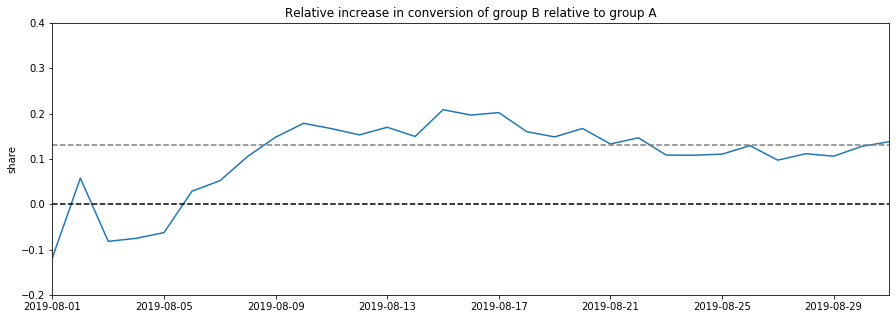

In [77]:
plt.figure(figsize=(15, 5))
plt.plot(merged_cumulative_conversions['date'], 
         merged_cumulative_conversions['conversion_B']/merged_cumulative_conversions['conversion_A']-1)
plt.title('Relative increase in conversion of group B relative to group A')
plt.ylabel('share')
plt.axhline(y=0, color='black', linestyle='--')      
plt.axhline(y=0.13, color='grey', linestyle='--')    
plt.axis(["2019-08-01", '2019-08-31', -0.2, 0.4])    

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. Продолжать смысла нет, потому как  вероятность того, что при продолжении теста сегмент B станет хуже сегмента A, стремиться к нулю.

<div class = "alert alert-success">
<h2> Комментарии ревьюера </h2>

Сделан выбор по результатам проведенного эксперимента, он обоснован расчетами и выводами.

</div>

<div class = "alert alert-success">
<h2> Комментарии ревьюера </h2>

Работа выполнена хорошо! Ты грамотно используешь методы pandas для работы с датафреймами, делаешь отличную визуализацию. Ты приводишь достаточно промежуточных выводов и пояснений к кодам, что делает работу четкой и понятной. Ты корректно провел проверку гипотез, молодец!
    
Можно еще добавить описание разделов - так в работе будет прослеживаться структура, и результаты аналитики будут выглядеть еще лучше :)

</div>